# Logistic Regression for churning of phone company customers

## Imamhussain Naikwade 

In [1]:
#importing reqiured libraries
import numpy as np
import pandas as pd

In [85]:
# reading the Dataset
phone_data = pd.read_csv("./phon.csv")

In [4]:
phone_data.head()

,phoneno,age,gender,zipcode,calls,sms,mms,charges,coverage,complaint,sim,phone,prepost,churn
0,5974,1,Male,91107,160,25,1,490,0,4,Dual Sim,Andoid,Prepaid,0
1,4535,1,Male,90089,150,45,19,340,0,3,Dual Sim,Andoid,Prepaid,0
2,4016,1,Male,94720,100,39,15,110,0,1,Single Sim,Andoid,Prepaid,0
3,8523,2,Male,94112,270,35,9,1000,0,1,Single Sim,Andoid,Prepaid,0
4,5052,2,Female,91330,100,35,8,450,0,4,Single Sim,Andoid,Prepaid,0


In [5]:
phone_data.shape
#Dataset contains 5000 rows and 14 columns

(5000, 14)

In [6]:
phone_data.info()
#Dataset contains 10 quantitative data and 4 qualitative data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   phoneno    5000 non-null   int64 
 1   age        5000 non-null   int64 
 2   gender     5000 non-null   object
 3   zipcode    5000 non-null   int64 
 4   calls      5000 non-null   int64 
 5   sms        5000 non-null   int64 
 6   mms        5000 non-null   int64 
 7   charges    5000 non-null   int64 
 8   coverage   5000 non-null   int64 
 9   complaint  5000 non-null   int64 
 10  sim        5000 non-null   object
 11  phone      5000 non-null   object
 12  prepost    5000 non-null   object
 13  churn      5000 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 547.0+ KB


In [10]:
#checking for NA values
phone_data.isna().sum()

phoneno      0
age          0
gender       0
zipcode      0
calls        0
sms          0
mms          0
charges      0
coverage     0
complaint    0
sim          0
phone        0
prepost      0
churn        0
dtype: int64

In [86]:
#getting dummy columns for categorical data
phone_data = pd.get_dummies(phone_data)

In [82]:
phone_data.head()

,phoneno,age,zipcode,calls,sms,mms,charges,coverage,complaint,gender_Female,gender_Male,sim_Dual Sim,sim_Single Sim,phone_Andoid,phone_IOS,prepost_Postpaid,prepost_Prepaid
0,5974,1,91107,160,25,1,490,0,4,0,1,1,0,1,0,0,1
1,4535,1,90089,150,45,19,340,0,3,0,1,1,0,1,0,0,1
2,4016,1,94720,100,39,15,110,0,1,0,1,0,1,1,0,0,1
3,8523,2,94112,270,35,9,1000,0,1,0,1,0,1,1,0,0,1
4,5052,2,91330,100,35,8,450,0,4,1,0,0,1,1,0,0,1


In [87]:
#checking Co-relation between the variables
phone_data.corr()

,phoneno,age,zipcode,calls,sms,mms,charges,coverage,complaint,churn,gender_Female,gender_Male,sim_Dual Sim,sim_Single Sim,phone_Andoid,phone_IOS,prepost_Postpaid,prepost_Prepaid
phoneno,1.000000,-0.006304,0.012883,-0.004702,0.003888,0.002111,-0.005398,0.001472,0.001578,-0.013415,0.029041,-0.029041,-0.002780,0.002780,0.023667,-0.023667,0.022381,-0.022381
age,-0.006304,1.000000,-0.017377,-0.136124,0.041334,0.013152,-0.187524,-0.026884,0.062579,0.136722,-0.011014,0.011014,-0.010812,0.010812,-0.013934,0.013934,-0.015004,0.015004
zipcode,0.012883,-0.017377,1.000000,-0.004061,-0.029216,-0.028626,-0.016410,0.008179,0.011224,0.000107,0.007691,-0.007691,0.004704,-0.004704,-0.019972,0.019972,0.016990,-0.016990
calls,-0.004702,-0.136124,-0.004061,1.000000,-0.052012,-0.050077,0.645984,0.089280,-0.107481,0.366889,-0.006689,0.006689,0.015086,-0.015086,-0.136534,0.136534,-0.003611,0.003611
sms,0.003888,0.041334,-0.029216,-0.052012,1.000000,0.994215,-0.055269,-0.013621,-0.046777,-0.007726,0.007681,-0.007681,-0.000436,0.000436,-0.008043,0.008043,0.013702,-0.013702
mms,0.002111,0.013152,-0.028626,-0.050077,0.994215,1.000000,-0.046574,-0.011868,-0.052467,-0.007413,0.008967,-0.008967,-0.001232,0.001232,-0.010353,0.010353,0.013898,-0.013898
charges,-0.005398,-0.187524,-0.016410,0.645984,-0.055269,-0.046574,1.000000,0.172243,-0.157734,0.502462,-0.002385,0.002385,-0.002616,0.002616,-0.169738,0.169738,0.014206,-0.014206
coverage,0.001472,-0.026884,0.008179,0.089280,-0.013621,-0.011868,0.172243,1.000000,-0.013637,0.123265,-0.003891,0.003891,-0.007064,0.007064,-0.081609,0.081609,-0.006777,0.006777
complaint,0.001578,0.062579,0.011224,-0.107481,-0.046777,-0.052467,-0.157734,-0.013637,1.000000,0.060288,0.009799,-0.009799,0.019924,-0.019924,-0.012108,0.012108,0.006154,-0.006154
churn,-0.013415,0.136722,0.000107,0.366889,-0.007726,-0.007413,0.502462,0.123265,0.060288,1.000000,0.002802,-0.002802,0.021954,-0.021954,-0.316355,0.316355,0.006278,-0.006278


In [ ]:
#we can see the many variables which are not co-related with churn and some are co-related with churn so lets built 2 models
#and compare the performance

In [67]:
#splitting the Dataset into 2 components X and Y
Y = phone_data['churn']
Y.replace({1:'Yes',0:'No'},inplace = True)
phone_data.drop('churn',axis = 1, inplace = True)
X = phone_data

In [68]:
X.shape,Y.shape

((5000, 17), (5000,))

In [69]:
#data Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df1 = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [39]:
scaled_df1.head()

,phoneno,age,zipcode,calls,sms,mms,charges,coverage,complaint,gender_Female,gender_Male,sim_Dual Sim,sim_Single Sim,phone_Andoid,phone_IOS,prepost_Postpaid,prepost_Prepaid
0,0.183163,-1.049078,-0.964114,-0.193385,-1.774417,-1.666078,-0.538229,-0.583102,1.396427,-0.645314,0.645314,2.928915,-2.928915,0.25354,-0.25354,-1.216618,1.216618
1,-0.369615,-1.049078,-1.443932,-0.250611,-0.029524,-0.096330,-0.864109,-0.583102,0.529834,-0.645314,0.645314,2.928915,-2.928915,0.25354,-0.25354,-1.216618,1.216618
2,-0.568984,-1.049078,0.738814,-0.536736,-0.552992,-0.445163,-1.363793,-0.583102,-1.203350,-0.645314,0.645314,-0.341423,0.341423,0.25354,-0.25354,-1.216618,1.216618
3,1.162337,0.141703,0.452243,0.436091,-0.901970,-0.968413,0.569765,-0.583102,-1.203350,-0.645314,0.645314,-0.341423,0.341423,0.25354,-0.25354,-1.216618,1.216618
4,-0.171015,0.141703,-0.859007,-0.536736,-0.901970,-1.055621,-0.625130,-0.583102,1.396427,1.549632,-1.549632,-0.341423,0.341423,0.25354,-0.25354,-1.216618,1.216618


### buliding model-1 using all the independent variables

In [70]:
#Splitting data into Train and Test data
from sklearn.model_selection import train_test_split
lr_train_x,lr_test_x,lr_train_y,lr_test_y = train_test_split(scaled_df1,Y,train_size = 0.2,random_state = 42)

In [71]:
#building logistic regression model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='sag', max_iter=1000)
model1.fit(lr_train_x,lr_train_y)
model1.score(lr_test_x,lr_test_y)

0.944

In [ ]:
# this model has score of 94%

In [77]:
#predicting using data from 0th index data where output is known as ['No']
model1.predict([[ 0.18316284, -1.04907792, -0.96411408, -0.19338544, -1.77441684,
       -1.66607847, -0.53822878, -0.58310181,  1.39642653, -0.64531434,
        0.64531434,  2.92891517, -2.92891517,  0.25354028, -0.25354028,
       -1.21661774,  1.21661774]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [73]:
#predicting using data from 9th index data where output is known as ['Yes']
model1.predict([[-0.40764537,  1.33248376, -0.0610391 ,  3.9840486 , -0.98921488,
       -0.96841258,  2.3077953 , -0.58310181, -1.2033498 , -0.64531434,
        0.64531434, -0.34142334,  0.34142334,  0.25354028, -0.25354028,
       -1.21661774,  1.21661774]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

### building model-2 using variables co-related with churn

In [105]:
#selecting variable co-related with 'churn'
scaled_df2 = scaled_df[['age','calls','charges','coverage','complaint','sim_Dual Sim',
       'sim_Single Sim','phone_Andoid', 'phone_IOS']]

In [112]:
#Splitting dataset into train and test data
from sklearn.model_selection import train_test_split
lr_train_x1,lr_test_x1,lr_train_y1,lr_test_y1 = train_test_split(scaled_df2,Y,train_size = 0.2,random_state = 42)

In [113]:
#building logistic regression model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='sag', max_iter=1000)
model2.fit(lr_train_x1,lr_train_y1)
model2.score(lr_test_x1,lr_test_y1)

0.94225

In [114]:
#predicting using data from 0th index data where output is known as ['No']
model2.predict([[-1.04907792, -0.19338544, -0.53822878, -0.58310181,  1.39642653,
        2.92891517, -2.92891517,  0.25354028, -0.25354028]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [104]:
#predicting using data from 9th index data where output is known as ['Yes']
model.predict([[ 1.33248376,  3.9840486 ,  2.3077953 , -0.58310181, -1.2033498 ,
       -0.34142334,  0.34142334,  0.25354028, -0.25354028]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

## Model-2 is better model as it's prediction score is same as model-1 with less number of independent variables 

# Confusion Matrix

In [118]:
actual = Y
predicted = model2.predict(np.array(scaled_df2))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(actual,predicted)

In [121]:
confusion_matrix

array([[4437,   83],
       [ 195,  285]], dtype=int64)

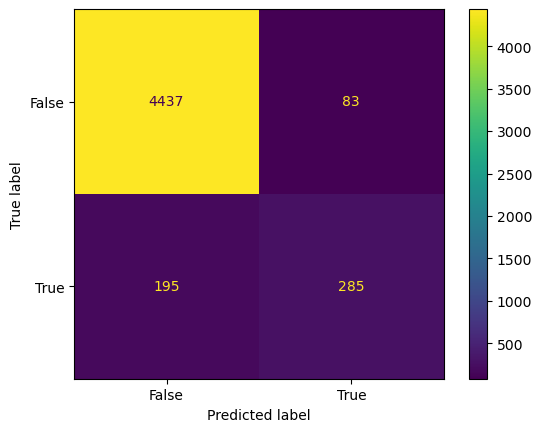

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### False Negative (Top-Left Quadrant)
### False Positive (Top-Right Quadrant)
### True Negative (Bottom-Left Quadrant)
### True Positive (Bottom-Right Quadrant)